<a href="https://colab.research.google.com/github/Ajwad07/ML_projects_2025/blob/main/concrete_ingredients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#load ds

url="https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df=pd.read_excel(url)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
df.shape

(1030, 9)

In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

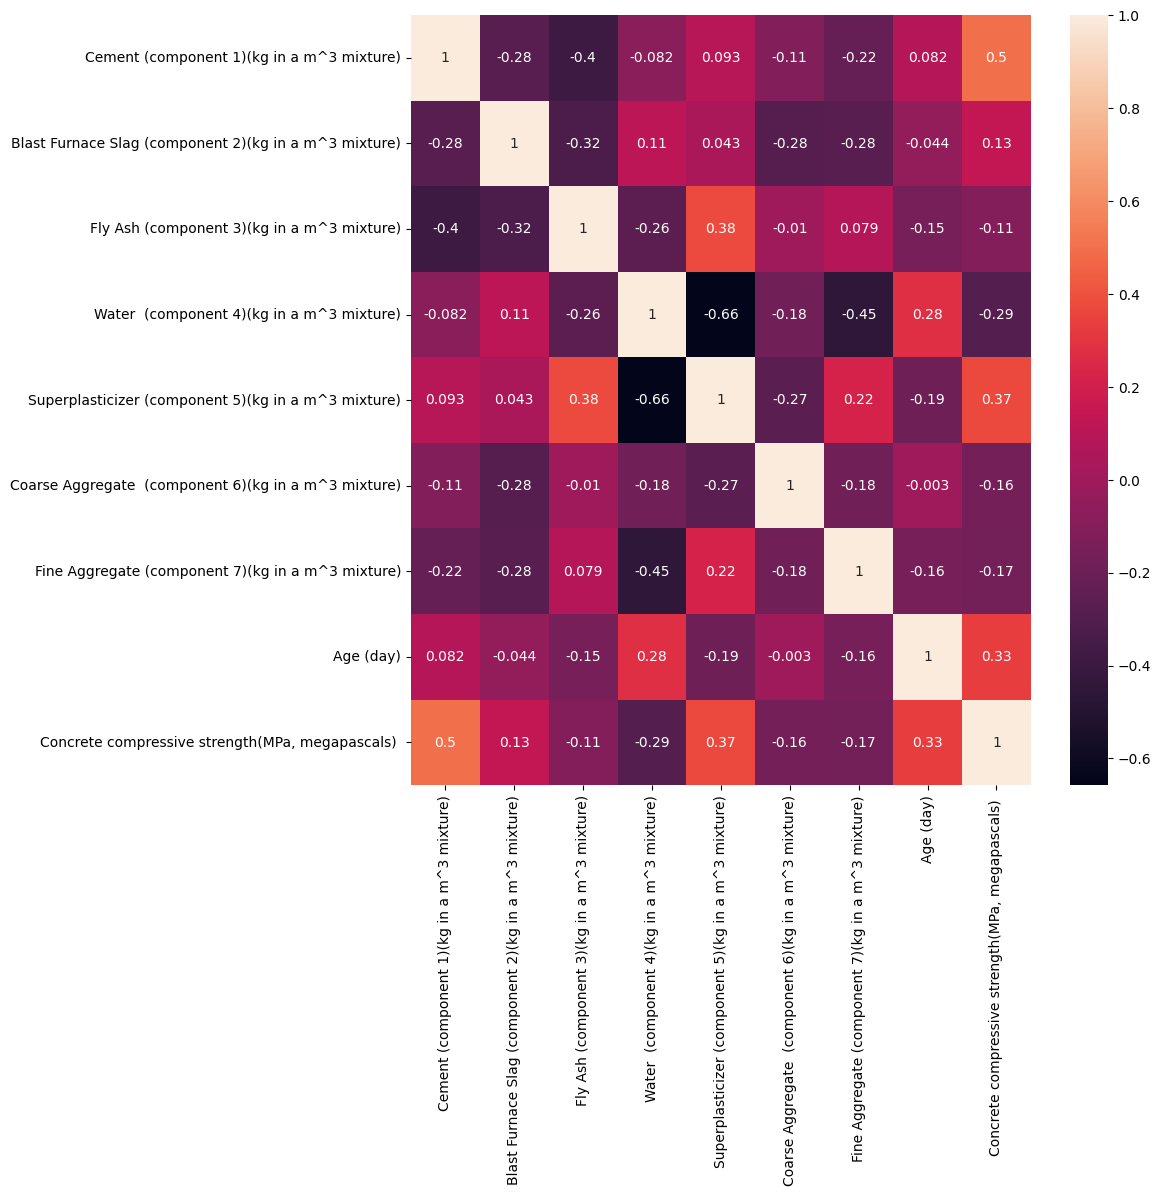

In [5]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

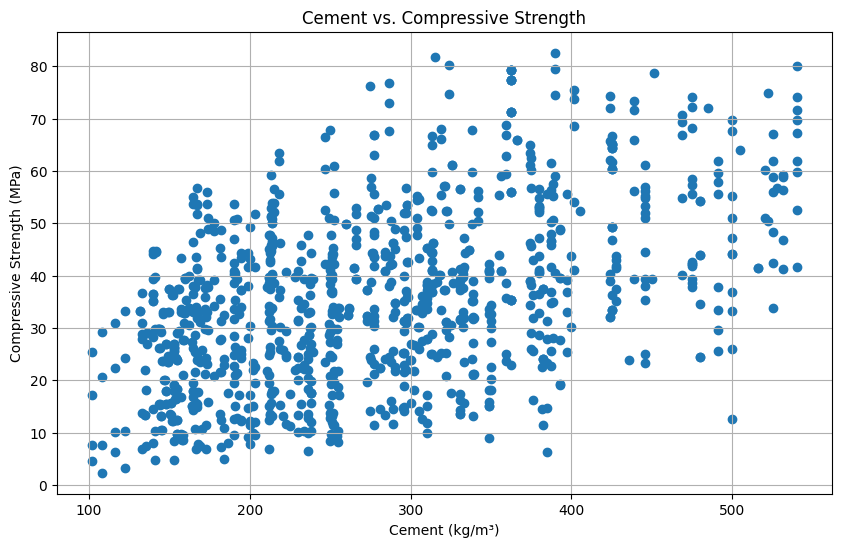

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0],df.iloc[:, -1])
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Cement vs. Compressive Strength')
plt.grid(True)
plt.show()

In [7]:
X=df.iloc[:,:-1] #all but last col

y=df.iloc[:,-1] #only last col

#pd to np array
X_array=X.values
y_array=y.values

print(f"X datatype:{type(X)}")
print(f"X_array datatype:{type(X_array)}")



X datatype:<class 'pandas.core.frame.DataFrame'>
X_array datatype:<class 'numpy.ndarray'>


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=1234)

In [9]:
X_train.shape

(824, 8)

In [10]:
X_test.shape

(206, 8)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#a linear reg model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)

#a random forrest model

rf_model=RandomForestRegressor(n_estimators=100,random_state=1234)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)


models=["Linear Regression","Random Forest"]
predictions=[lr_pred,rf_pred]

for model,pred in zip(models,predictions):
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    print(f"{model} MSE:{mse:.2f}, R2:{r2:.2f}")

Linear Regression MSE:105.02, R2:0.58
Random Forest MSE:21.49, R2:0.91


In [12]:
from sklearn.neighbors import KNeighborsRegressor

# kNN model without scaling
knn_model_no_scale = KNeighborsRegressor(n_neighbors=100)
knn_model_no_scale.fit(X_train, y_train)
knn_pred_no_scale = knn_model_no_scale.predict(X_test)

# Evaluate the unscaled kNN model
mse_knn_no_scale = mean_squared_error(y_test, knn_pred_no_scale)
r2_knn_no_scale = r2_score(y_test, knn_pred_no_scale)

print(f"kNN without Scaling MSE: {mse_knn_no_scale:.2f}, R2: {r2_knn_no_scale:.2f}")

kNN without Scaling MSE: 138.76, R2: 0.45


In [13]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# kNN model with scaling
knn_model_scaled = KNeighborsRegressor(n_neighbors=100)
knn_model_scaled.fit(X_train_scaled, y_train)
knn_pred_scaled = knn_model_scaled.predict(X_test_scaled)

# Evaluate the scaled kNN model
mse_knn_scaled = mean_squared_error(y_test, knn_pred_scaled)
r2_knn_scaled = r2_score(y_test, knn_pred_scaled)

print(f"kNN with Scaling MSE: {mse_knn_scaled:.2f}, R2: {r2_knn_scaled:.2f}")

kNN with Scaling MSE: 132.18, R2: 0.48


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=1234), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best negative MSE: {best_score:.2f}")

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best negative MSE: -28.34


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': randint(50, 201),  # Sample integers between 50 and 200
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11), # Sample integers between 2 and 10
    'max_features': uniform(0.1, 1.0) # Sample floats between 0.1 and 1.0
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=1234), param_distributions, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=1234) # n_iter is the number of combinations to sample

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best parameters (Random Search): {best_params_random}")
print(f"Best negative MSE (Random Search): {best_score_random:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best parameters (Random Search): {'max_depth': 20, 'max_features': np.float64(0.7303144424842815), 'min_samples_split': 3, 'n_estimators': 66}
Best negative MSE (Random Search): -27.64


In [16]:
!pip install optuna==3.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.9 MB/s eta 0:00:00


 This cell performs Bayesian hyperparameter optimization for the RandomForestRegressor using the optuna library. It defines an objective function that takes an Optuna trial object. Inside the objective function, it uses trial.suggest_... methods to define the hyperparameter search space and samples a set of hyperparameters for the current trial. It then trains the Random Forest model with these hyperparameters and evaluates its performance using 5-fold cross-validation, returning the mean negative MSE. optuna.create_study initializes the optimization study, specifying the direction to maximize the objective (maximize negative MSE to minimize MSE). study.optimize runs the Bayesian optimization process for 100 trials, iteratively searching for the best hyperparameters. Finally, it prints the best parameters found by
 Optuna and the corresponding best negative MSE value.

In [17]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30) if trial.suggest_categorical('max_depth_none', [True, False]) else None
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    max_features = trial.suggest_uniform('max_features', 0.1, 1.0)

    # Create the RandomForestRegressor model with suggested hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=1234
    )

    # Evaluate the model using cross-validation (negative MSE)
    # We use negative MSE because Optuna by default minimizes the objective function
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

# Create a study object
study = optuna.create_study(direction='maximize') # We want to maximize the negative MSE (which means minimizing MSE)

# Run the optimization
study.optimize(objective, n_trials=100) # Run 100 trials

# Print the best parameters and best score
print("Best parameters (Bayesian Search):", study.best_params)
print("Best negative MSE (Bayesian Search):", study.best_value)

[I 2025-05-19 14:31:17,946] A new study created in memory with name: no-name-149a5d66-3325-47ad-b7f2-56f39a4acf12
<ipython-input-17-1293ba3bb891>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0.1, 1.0)
[I 2025-05-19 14:31:24,867] Trial 0 finished with value: -27.63103253416557 and parameters: {'n_estimators': 156, 'max_depth_none': True, 'max_depth': 23, 'min_samples_split': 2, 'max_features': 0.7179903633072326}. Best is trial 0 with value: -27.63103253416557.
<ipython-input-17-1293ba3bb891>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0.1, 1.0)
[I 2025-05-19 14:31:28,783] Trial 1 finished w

Best parameters (Bayesian Search): {'n_estimators': 88, 'max_depth_none': True, 'max_depth': 14, 'min_samples_split': 2, 'max_features': 0.659489370044438}
Best negative MSE (Bayesian Search): -27.368569901707435


Importing Libraries and Loading Data: Loading
Data Exploration: Shape and Missing Values: Explore
Data Exploration: Correlation Analysis: Correlate
Data Exploration: Visualizing a Key Relationship: Visualize
Data Preparation: Splitting Features and Target: Separate
Data Preparation: Splitting into Training and Testing Sets: Split
Checking the Shape of Training and Testing Sets: Verify
Training and Evaluating Baseline Models (Linear Regression and Random Forest): Model
Training and Evaluating kNN Model Without Scaling: kNN (Unscaled)
Training and Evaluating kNN Model With Scaling: kNN (Scaled)
Hyperparameter Optimization: Grid Search for Random Forest: GridSearch
Hyperparameter Optimization: Random Search for Random Forest: RandomSearch
Installing Optuna for Bayesian Optimization: Install
Hyperparameter Optimization: Bayesian Search (Optuna) for Random Forest: BayesianOpt